In [114]:
# import libraries
import pandas as pd
import numpy as np

# For visualize
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Read the Data
diamond_prices = pd.read_csv('Diamonds Prices2022.csv')
diamond_prices.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [116]:
# Data Cleaning, Set 'Unnamed: 0' as a index and rename it

diamond_prices.set_index('Unnamed: 0', inplace=True)
diamond_prices.index.name = 'Index'

In [117]:
# Check Null Values
diamond_prices.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [118]:
#Rename the columns. I will use Dictionary Comprehension
columns = pd.Series(diamond_prices.columns)
diamond_prices.rename(columns={x:x.title() for x in columns}, inplace=True)

In [119]:
diamond_prices.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
Index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [120]:
diamond_prices.groupby(['Cut', 'Clarity'])['Carat'].value_counts()

Cut        Clarity  Carat
Fair       I1       0.70     26
                    1.50     12
                    0.96     11
                    0.50     10
                    1.00     10
                             ..
Very Good  VVS2     1.76      1
                    1.86      1
                    2.00      1
                    2.01      1
                    2.03      1
Name: Carat, Length: 4477, dtype: int64

*** Count Value: 'Cut', 'Color', 'Clarity'

Goals:
Visualize the amount of diamonds from each type of cut
Visualize the amount of diamonds from each type of color
Visualize the amount of diamonds from each type of clarity
Explain the result

In [121]:
def ValueGraph(text):
    values = diamond_prices[text].value_counts()
    index = diamond_prices[text].value_counts().index

    plt.figure(figsize=(10, 7))
    sns.barplot(x=[x for x in values], y=[x for x in index], alpha=0.6);
    plt.title(f'Count Value: {text}')

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object'): Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: Cut, dtype: int64
Index(['G', 'E', 'F', 'H', 'D', 'I', 'J'], dtype='object'): G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: Color, dtype: int64
Index(['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'], dtype='object'): SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: Clarity, dtype: int64


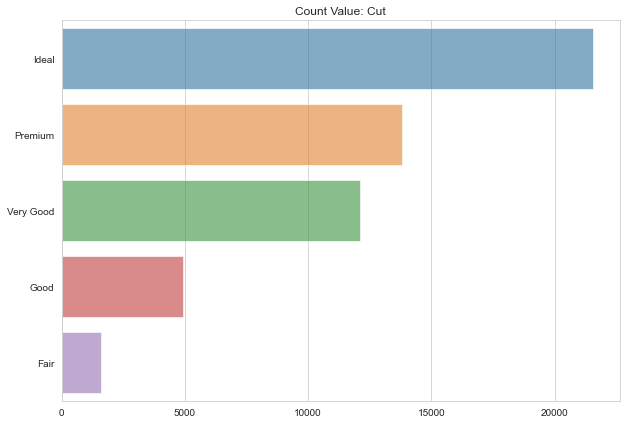

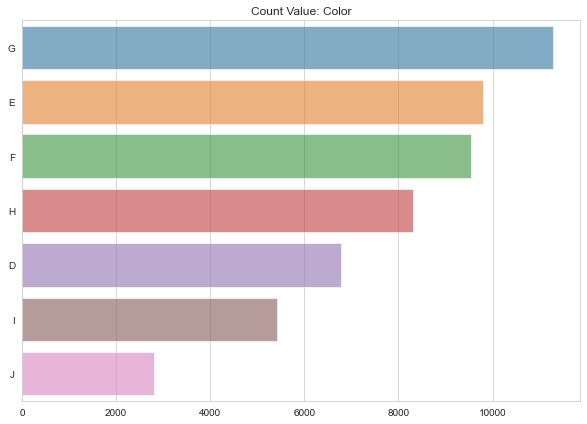

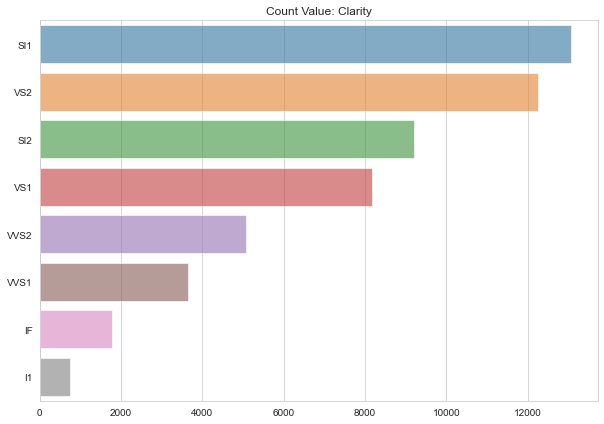

In [126]:
colums = ['Cut', 'Color', 'Clarity']
for i in colums:
    ValueGraph(i)

In [135]:
for i in ['Cut', 'Color', 'Clarity']:
    print(diamond_prices[i].value_counts(), '\n')


Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: Cut, dtype: int64 

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: Color, dtype: int64 

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: Clarity, dtype: int64 



Count Value: Cut
There are 5 cut types: Ideal, Premium, Very Good, Good, Fair
Ideal cut is the highest number of diamond on diamond cut type because it includes 21551 diamonds
Fair cut is the lowest number of diamonds on diamond cut type because it only includes 1610 diamond

Count Value: Color
There are 7 color of diamonds : G, E, F, H, D, I, J
Color G is the highest number of diamond on diamond color because it includes 11292 diamonds
Color J is the lowest number of diamonds on diamond color because it only includes 2808 diamonds

Count Value: Clarity
There are 8 clarity types of diamonds: SI1, VS2, SI2, VS1, WS2, WS1, IF, I1
SI1 is the highest number of diamond on diamond clarity because it includes 13067 diamonds
I2 is the lowest number of diamonds on diamond clarity because it only includes 741 diamonds

*** Get Percentage Amount: 'Cut','Color','Clarity'
Goals:
Visualize the percentage of Cut
Visualize the percentage of Color
Visualize the percentage of Clarity
Explain the result

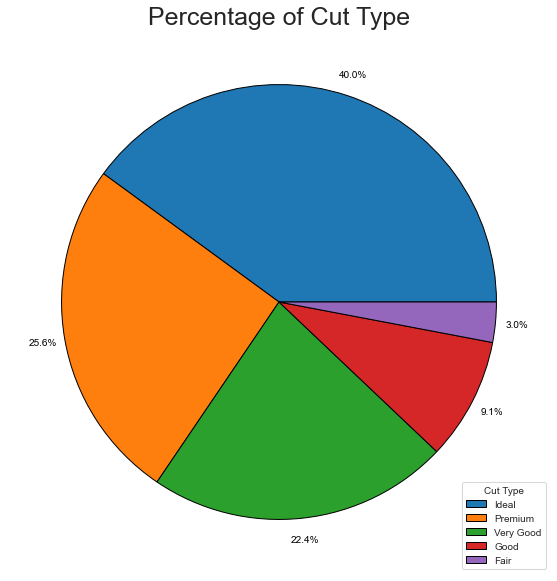

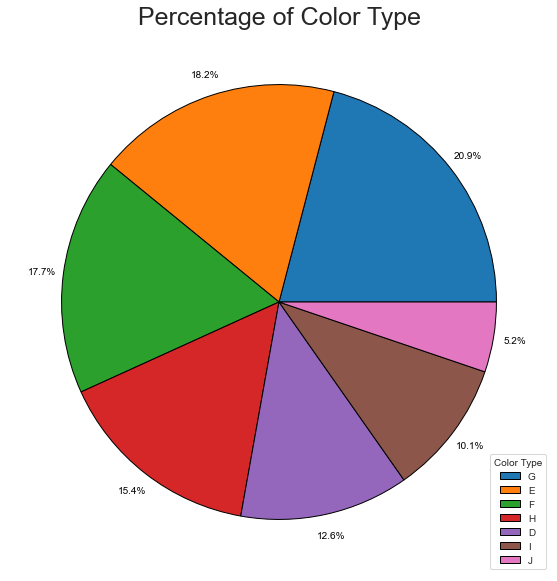

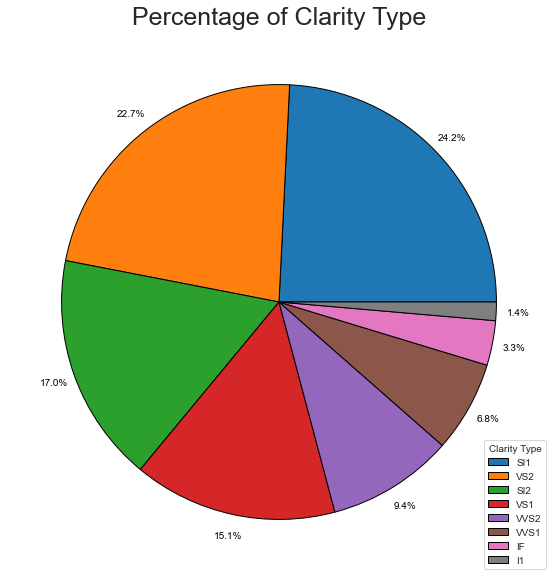

In [147]:
def percentagePie(column):
    plt.figure(figsize=(10, 10))
    plt.pie(diamond_prices[column].value_counts(), autopct = '%1.1f%%', pctdistance = 1.1,
        wedgeprops = {'linewidth':1.0, 'edgecolor':'black'},
        textprops  = {'color' : 'black', 'fontsize':10})
    legendTitle = column + " Type"
    plt.legend(labels=diamond_prices[column].value_counts().index, title=legendTitle, loc='lower right')
    title = 'Percentage of ' + column + ' Type'
    plt.title(title, size=25)

columns = ['Cut', 'Color', 'Clarity']
for i in columns:
    percentagePie(i)

Percentage of Cut Type:
40% of diamonds are ideal cut type
25.6% of diamonds are premium cut type
22.4% of diamonds are very good cut type
9.1% of diamonds are good cut type
3% of diamonds are fair cut type

Percentage of Color Type:
20.9% of diamonds are G color type
18.2% of diamonds are E color type
17.7% of diamonds are F color type
15.4% of diamonds are H color type
12.6% of diamonds are D color type
10.1% of diamonds are I color type
5.2% of diamonds are J color type

Percentage of Clarity Type:
24.5% of diamonds are SI1 clarity type
22.7% of diamonds are VS2 clarity type
17.0% of diamonds are SI2 clarity type
15.1% of diamonds are VS1 clarity type
9.4% of diamonds are WS2 clarity type
6.8% of diamonds are WS1 clarity type
3.3% of diamonds are IF clarity type
1.4% of diamonds are I1 clarity type

*** Count Density: 'Carat', 'Depth','Table','Price','x','y','z'

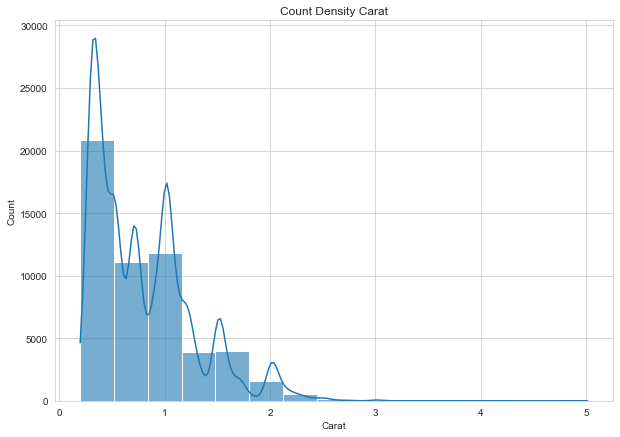

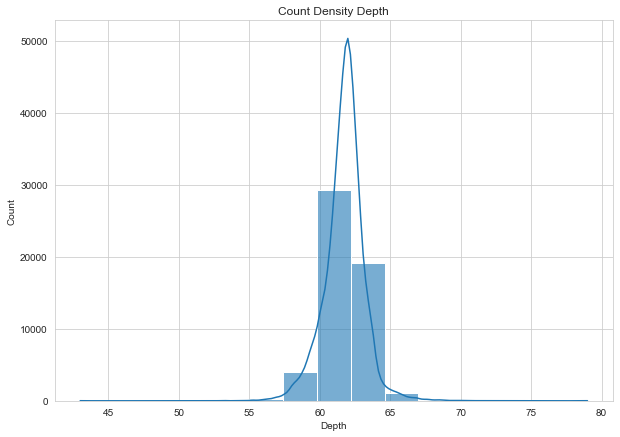

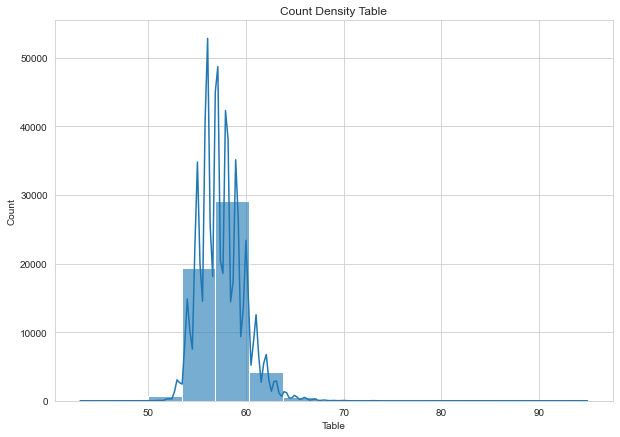

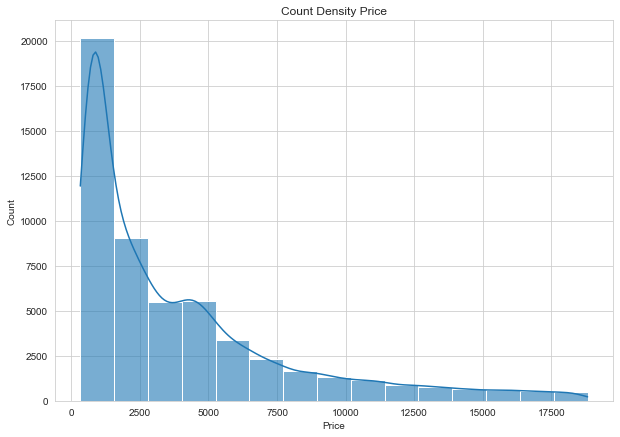

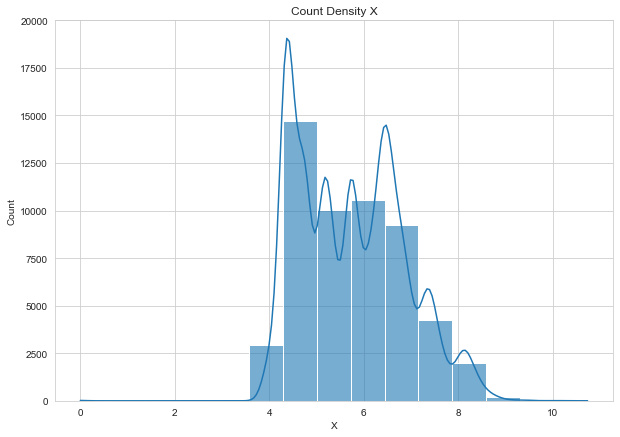

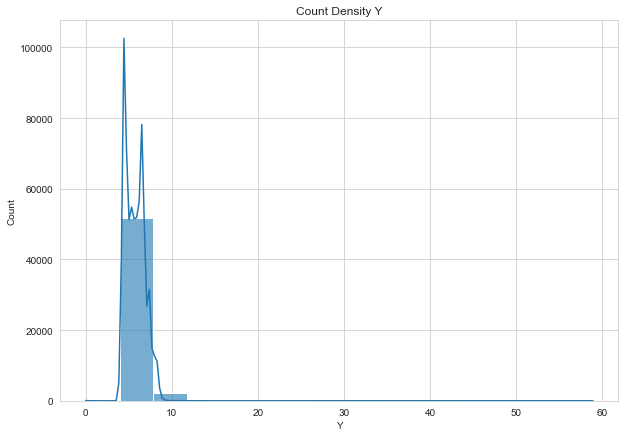

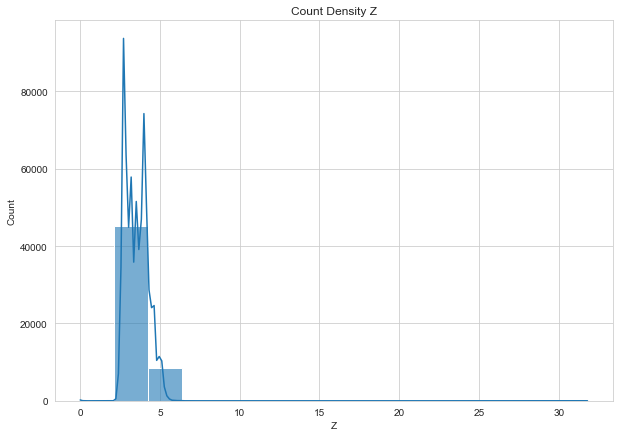

In [152]:
def CountDensity(column):
    plt.figure(figsize=(10, 7))
    sns.histplot(diamond_prices[column], bins=15, kde=True, alpha=0.6)
    title = 'Count Density ' + column
    plt.title(title)

for i in ['Carat', 'Depth','Table','Price','X','Y','Z']:
    CountDensity(i)

Count Density: Carat
The number of diamond dynamically gets lower if the carat gets higher

Count Density: Depth , Table
The number of diamond is well distributed based on the diamond depth and table

Count Density: Price
The number of diamond gets lower if the diamond price gets higher

Count Density: X, Y, Z
The number of diamond is well distributed based on x, y and z

*** Highest Price based on Cut, Color and Clarity

In [212]:
def HighestPrice(text):
    plt.figure(figsize=(10,7))
    for i in range(len(diamond_prices[text].value_counts().index)):
        col_val = diamond_prices[text].value_counts().index[i]
        data = diamond_prices.loc[diamond_prices[text] == col_val].sort_values('Price', ascending = False).head().copy()
        data = data.reset_index(drop=True)
        plt.scatter(x=data['Carat'], y=data['Price'], marker='*', s=125, alpha=0.7)
    legend = text + ' type: '
    plt.legend(diamond_prices[text].value_counts().index, title = legend)
    title = "Highest Price: " + text
    plt.title(title,fontsize = 20)

def Function(columns):
    for i in range(len(columns)):
        HighestPrice(columns[i])

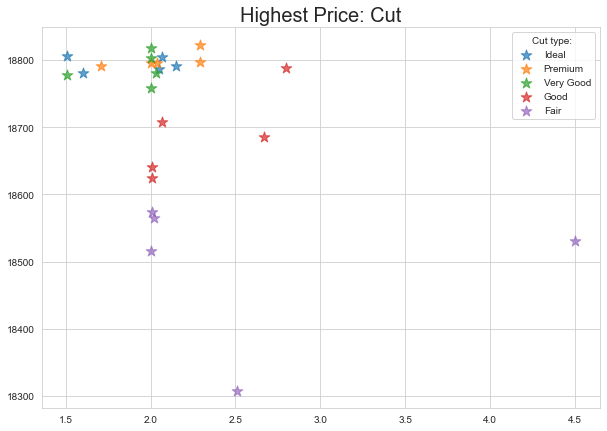

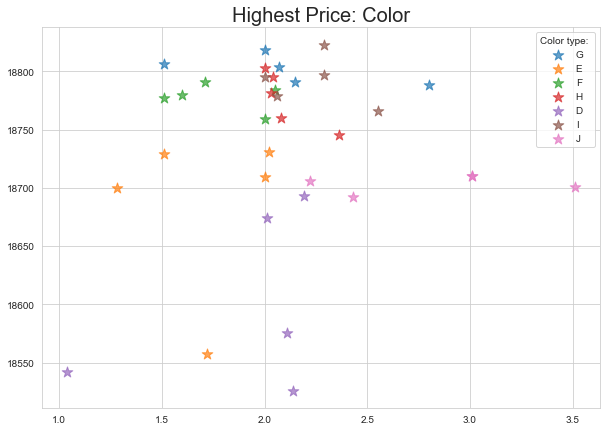

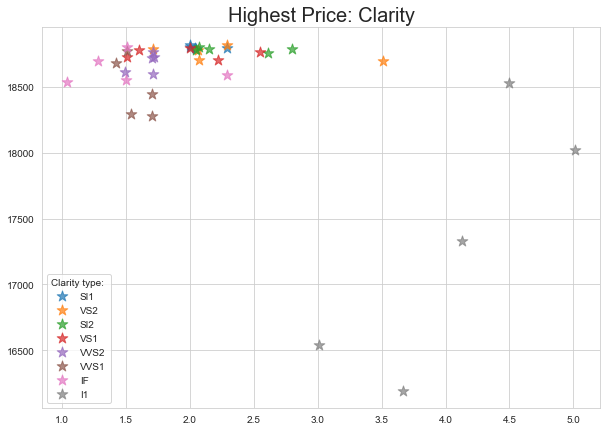

In [213]:
columns = ['Cut', 'Color', 'Clarity']
Function(columns)

Highest Price: Cut
The highest price based on ideal cut is around 18830 and its carat value is around 1.5
The highest price based on premium cut is around 18840 and its carat value is around 2.3
The highest price based on very good cut is around 18830 and its carat value is around 2.0
The highest price based on good cut is around 18790 and its carat value is around 2.7
The highest price based on fair cut is around 18590 and its carat value is around 2.0

Highest Price: Color
The highest price based on G color is around 18830 and its carat value is around 2.0
The highest price based on E color is around 18740 and its carat value is around 1.5
The highest price based on F color is around 18790 and its carat value is around 1.7
The highest price based on H color is around 18800 and its carat value is around 2.0
The highest price based on D color is around 18700 and its carat value is around 2.2
The highest price based on I color is around 18840 and its carat value is around 2.3
The highest price based on J color is around 18710 and its carat value is around 3.0

Highest Price: Clarity
The highest price based on SI1 clarity is around 18900 and its carat value is around 2.0
The highest price based on VS2 clarity is around 18900 and its carat value is around 2.3
The highest price based on SI2 clarity is around 18850 and its carat value is around 2.1
The highest price based on VS1 clarity is around 18850 and its carat value is around 2.0
The highest price based on WS2 clarity is around 18900 and its carat value is around 1.5
The highest price based on WS1 clarity is around 18880 and its carat value is around 2.0
The highest price based on IF clarity is around 18900 and its carat value is around 1.5
The highest price based on I1 clarity is around 18550 and its carat value is around 4.5

*** Lowest Price based on Cut, Color and Clarity

In [217]:
def LowestPrice(text):
    plt.figure(figsize=(10,7))
    for i in range(len(diamond_prices[text].value_counts().index)):
        col_val = diamond_prices[text].value_counts().index[i]
        data = diamond_prices.loc[diamond_prices[text] == col_val].sort_values('Price', ascending = True).head().copy()
        data = data.reset_index(drop=True)
        plt.scatter(x=data['Carat'], y=data['Price'], marker='*', s=125, alpha=0.7)
    legend = text + ' type: '
    plt.legend(diamond_prices[text].value_counts().index, title = legend)
    title = "Lowest Price: " + text
    plt.title(title,fontsize = 20)

def FunctionLow(columns):
    for i in range(len(columns)):
        LowestPrice(columns[i])

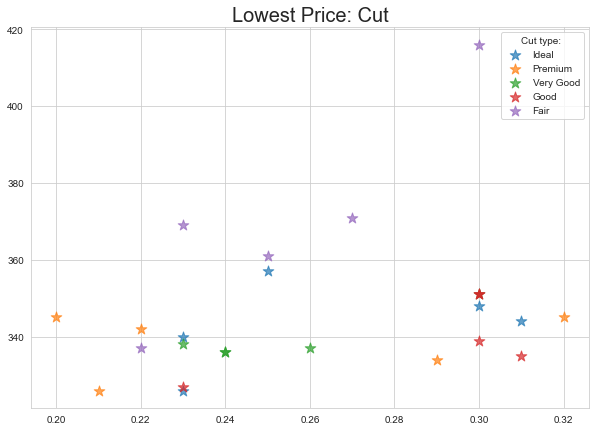

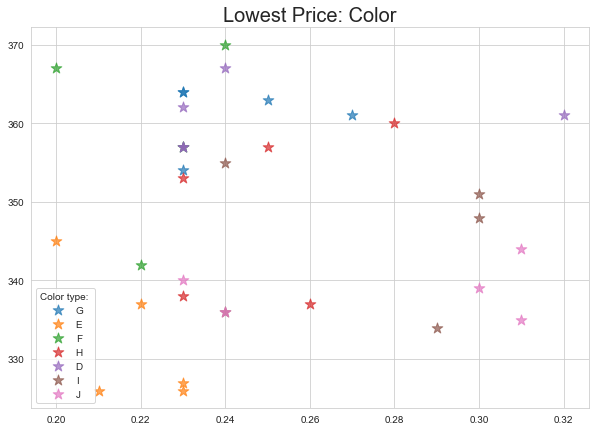

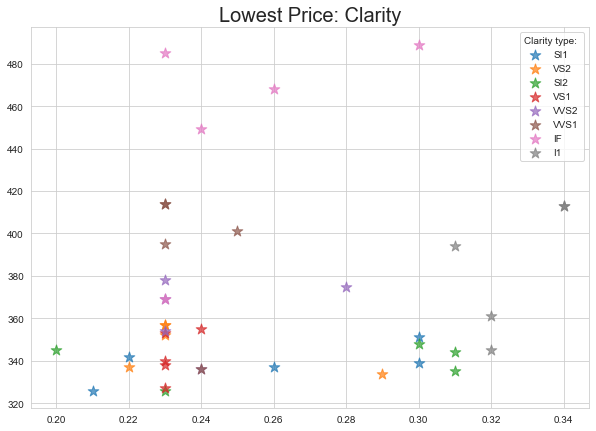

In [218]:
columns = ['Cut', 'Color', 'Clarity']
FunctionLow(columns)

Lowest Price: Cut
The lowest price based on ideal cut is around 330 and its carat value is around 0.23
The lowest price based on premium cut is around 330 and its carat value is around 0.21
The lowest price based on very good cut is around 335 and its carat value is around 0.24
The lowest price based on good cut is around 330 and its carat value is around 0.23
The lowest price based on fair cut is around 338 and its carat value is around 0.22

Lowest Price: Color
The lowest price based on G color is around 355 and its carat value is around 0.23
The lowest price based on E color is around 320 and its carat value is around 0.21
The lowest price based on F color is around 341 and its carat value is around 0.22
The lowest price based on H color is around 339 and its carat value is around 0.26
The lowest price based on D color is around 337 and its carat value is around 0.24
The lowest price based on I color is around 337 and its carat value is around 0.29
The lowest price based on J color is around 336 and its carat value is around 0.31

Lowest Price: Clarity
The lowest price based on SI1 clarity is around 325 and its carat value is around 0.21
The lowest price based on VS2 clarity is around 339 and its carat value is around 0.29
The lowest price based on SI2 clarity is around 323 and its carat value is around 0.23
The lowest price based on VS1 clarity is around 330 and its carat value is around 0.23
The lowest price based on WS2 clarity is around 357 and its carat value is around 0.23
The lowest price based on WS1 clarity is around 340 and its carat value is around 0.26
The lowest price based on IF clarity is around 370 and its carat value is around 0.23
The lowest price based on I1 clarity is around 345 and its carat value is around 0.32